In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data


In [7]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [8]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

## Data preprocessing

In [9]:
df['days_to_pay']=pd.DatetimeIndex(df.paid_off_time).normalize()-pd.DatetimeIndex(df.effective_date)

In [10]:
df.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,days_to_pay
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male,6 days
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female,29 days


In [11]:
print(df.loan_status.unique())

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


Here in the dataset loan_status feature values are:
'PAIDOFF'           : means paid within due date
'COLLECTION'        : due date is crossed and not yet paid
'COLLECTION_PAIDOFF': paid after the due date

Fpr sake of simplicity we assume 'COLLECTION_PAIDOFF' also as not paid because they paid after the due date.

In [12]:
status_map={'PAIDOFF':1,'COLLECTION':2,'COLLECTION_PAIDOFF':2}
df['loan_status_trgt']=df['loan_status'].map(status_map)

In [13]:
print(df.loan_status_trgt.unique())

[1 2]


In [14]:
df['loan_status_trgt'].value_counts()

1    300
2    200
Name: loan_status_trgt, dtype: int64

In [15]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'days_to_pay', 'loan_status_trgt'],
      dtype='object')

Since 'education' and 'gender' are not integer type we convert with some dummy variables

In [16]:
dummies = pd.get_dummies(df['education']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['education'],  axis=1)

dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'is_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Gender'], axis=1)

df = df.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'days_to_pay'], axis=1)

In [17]:
df.head()

,Principal,terms,age,loan_status_trgt,is_Bechalor,is_High School or Below,is_Master or Above,is_college,is_female,is_male
0,1000,30,45,1,0,1,0,0,0,1
1,1000,30,50,1,1,0,0,0,1,0
2,1000,30,33,1,1,0,0,0,1,0
3,1000,15,27,1,0,0,0,1,0,1
4,1000,30,28,1,0,0,0,1,1,0


In [18]:
df=df.drop(['is_female','is_Master or Above'],axis=1)

In [19]:
df.head(2)

,Principal,terms,age,loan_status_trgt,is_Bechalor,is_High School or Below,is_college,is_male
0,1000,30,45,1,0,1,0,1
1,1000,30,50,1,1,0,0,0


splitting into input varible X and target variable y

In [20]:
X=df.drop(['loan_status_trgt'],axis=1)
y=df.loan_status_trgt

converting pandas dataframes into numpy arrays

In [21]:
X=np.asarray(X)
y=np.asarray(y)

In [22]:
print(X)

[[1000   30   45 ...    1    0    1]
 [1000   30   50 ...    0    0    0]
 [1000   30   33 ...    0    0    0]
 ...
 [ 800   15   30 ...    0    1    1]
 [1000   30   38 ...    0    1    0]
 [1000   30   28 ...    1    0    1]]


In [23]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [24]:
from sklearn import preprocessing

In [25]:
X_norm=preprocessing.StandardScaler(with_mean=True,with_std=True).fit(X).transform(X.astype(float))
X_norm[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.49337687,  0.89789115,  2.28404253, -0.39336295,  1.17997648,
        -0.88640526,  0.42665337],
       [ 0.49337687,  0.89789115,  3.10658738,  2.54218146, -0.84747452,
        -0.88640526, -2.34382305],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.54218146, -0.84747452,
        -0.88640526, -2.34382305],
       [ 0.49337687, -0.97897162, -0.67711892, -0.39336295, -0.84747452,
         1.12815215,  0.42665337],
       [ 0.49337687,  0.89789115, -0.51260995, -0.39336295, -0.84747452,
         1.12815215, -2.34382305]])

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.2,random_state=5)

In [28]:
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


# KNN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k=4
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [31]:
yhat=knn.predict(X_test)
yhat[0:5]

array([1, 2, 1, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("Train set accuracy = ",accuracy_score(y_train,knn.predict(X_train)))
print("Test set accuracy = ",accuracy_score(y_test,yhat))

Train set accuracy =  0.6975
Test set accuracy =  0.61


In [34]:
#calculating accuracy for different k values
ks=10
mean_accu=np.zeros(ks-1)
for i in range(1,ks):
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_accu[i-1]=accuracy_score(y_test,yhat)
print(mean_accu)
    

[0.46 0.59 0.53 0.61 0.6  0.56 0.56 0.59 0.52]


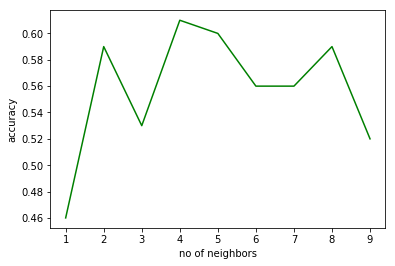

In [35]:
plt.plot(range(1,ks),mean_accu,'g')
plt.xlabel('no of neighbors')
plt.ylabel('accuracy')
plt.show()

we are getting more accuracy when k=4

# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dX_train,dX_test,dy_train,dy_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [38]:
print(dX_train[0:5])

[[ 800   15   34    0    1    0    1]
 [1000   15   30    0    0    1    1]
 [1000   30   33    1    0    0    1]
 [1000   30   26    0    0    1    1]
 [1000   30   20    0    1    0    1]]


In [39]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [40]:
dtree.fit(dX_train,dy_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
predTree=dtree.predict(dX_test)

In [42]:
predTree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
print("Decision tree accuracy = ",accuracy_score(dy_test,predTree))

Decision tree accuracy =  0.58


In [48]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

In [45]:
dot_data = StringIO()
filename = "decisiontree.png"
featureNames = df.drop(["loan_status_trgt"],axis=1).columns
targetNames = df["loan_status_trgt"].unique().tolist()
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(dy_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'tree' is not defined

## SVM

In [50]:
from sklearn import svm

In [51]:
clf=svm.SVC(kernel="rbf")
clf.fit(dX_train,dy_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
yhat=clf.predict(dX_test)
yhat[0:5]

array([1, 2, 1, 1, 1])

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.61      0.78      0.69        59
           2       0.48      0.29      0.36        41

   micro avg       0.58      0.58      0.58       100
   macro avg       0.55      0.54      0.53       100
weighted avg       0.56      0.58      0.55       100

Confusion matrix, without normalization
[[46 13]
 [29 12]]


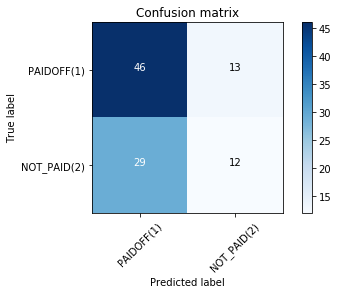

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(dy_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(dy_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','NOT_PAID(2)'],normalize= False,  title='Confusion matrix')

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5541655359565807

In [57]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(dy_test, yhat)

0.58

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression 

In [59]:
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
yhat=lr.predict(X_test)

In [61]:
yhat[0:5]

array([1, 2, 2, 1, 1])

In [62]:
yhat_prob=lr.predict_proba(X_test)
yhat_prob[0:5]

array([[0.61, 0.39],
       [0.49, 0.51],
       [0.5 , 0.5 ],
       [0.57, 0.43],
       [0.54, 0.46]])

In [63]:
from sklearn.metrics import jaccard_similarity_score

In [64]:
jaccard_similarity_score(yhat,y_test)

0.54

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[47 12]
 [34  7]]


Confusion matrix, without normalization
[[47 12]
 [34  7]]


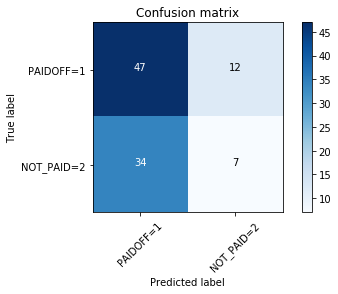

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF=1','NOT_PAID=2'],normalize= False,  title='Confusion matrix')

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.4918095238095239

In [68]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6832983822072184

### From all the above 4 classifiers we can observe that we got highest accuracy rate in the case of KNN classifier.